In [ ]:
!pip install geopandas
!pip install contextily

In [ ]:
import contextily
import matplotlib.pyplot as plt
from google.colab import drive
import pandas as pd
import geopandas
from shapely.geometry import Point
import xyzservices.providers as xyz

In [ ]:
regioni = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Geopandas Esercizi/File.ZIP/Limiti01012021_g/Reg01012021_g")
regioni

In [ ]:
province = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Geopandas Esercizi/File.ZIP/Limiti01012021_g/ProvCM01012021_g")
province

Dato il nome di una regione (inserito dall’utente), visualizzare su una mappa i confini della regione e le
province di quella regione. Utilizzare il colore nero per i confini. Visualizzare anche il nome della provincia.
Visualizzare poi un’altra mappa che colori ogni provincia a seconda del numero di comuni presenti. Usare le
gradazioni di rosso. Controllare che la regione sia presente nel dataset: in caso negativo dare un messaggio
di errore.

inserire una regione Lombardia


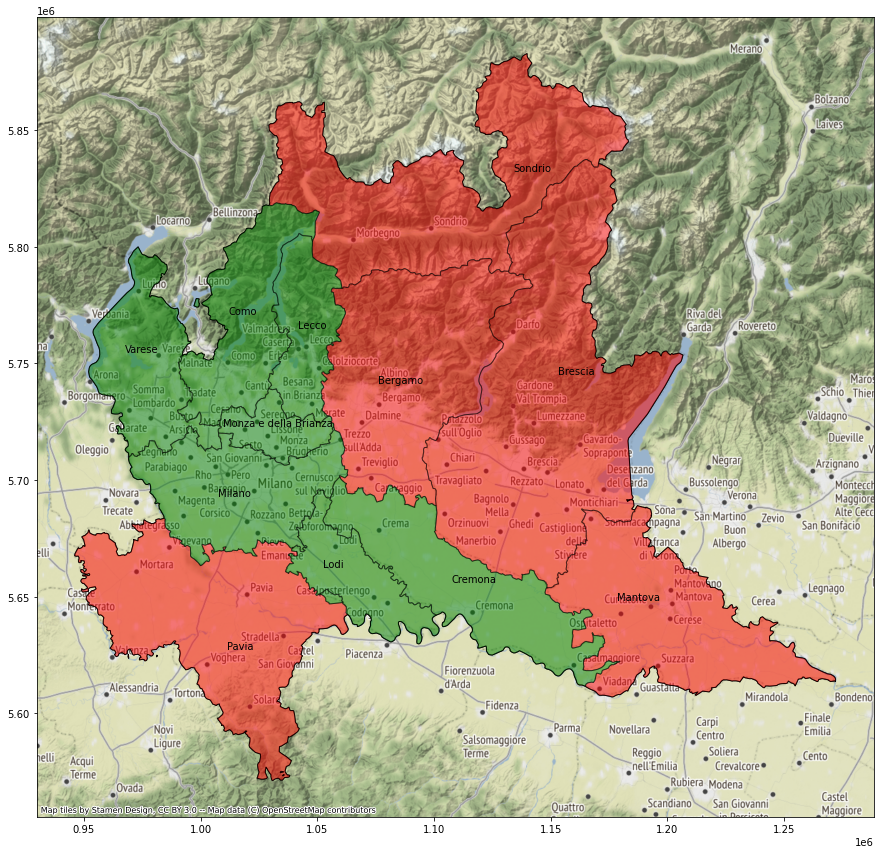

In [ ]:
regione_input = input("inserire una regione ")
if regione_input in list(regioni.DEN_REG):
  regione = regioni[regioni.DEN_REG == regione_input] 
  provincia_regione = province[province.within(regione.geometry.squeeze())]

# Facciamo la Media
  media = provincia_regione.Shape_Area.mean()
  prov_Maggiori = provincia_regione[provincia_regione.Shape_Area >= media]
  prov_Minori = provincia_regione[provincia_regione.Shape_Area < media]

# Usiamo le cordinte del dataframe
  prov_reg3857 = provincia_regione.to_crs(epsg = 3857) #prov_reg3857 gli cambiamo il "CRS" in 3857
  prov_reg3857["coords"] = prov_reg3857["geometry"].apply(lambda x: x.representative_point().coords[:])
  prov_reg3857["coords"] = [coords[0] for coords in prov_reg3857["coords"]]

# PLOT
  ax = regione.to_crs(epsg = 3857).plot(figsize=(15,15),facecolor = "none", edgecolor = "k")
  prov_Maggiori.to_crs(epsg=3857).plot(ax=ax, facecolor="red", alpha = 0.5, edgecolor = "k")
  prov_Minori.to_crs(epsg=3857).plot(ax=ax, facecolor="green", alpha = 0.5, edgecolor = "k")
  contextily.add_basemap(ax, crs=3857)

# Ciclo per mettere il nome della provincia al centro
  for idx, row in prov_reg3857.iterrows():
    plt.annotate(s=row["DEN_UTS"], xy=row["coords"], horizontalalignment="center", color="k") 

else :
  print("Regione inesistente")

Cercare la provincia che ha la superficie maggiore. Visualizzare poi su una mappa la provincia con la
superficie maggiore e tutte le province con cui confina. Colorare di verde la provincia più estesa e di giallo
le province confinanti.

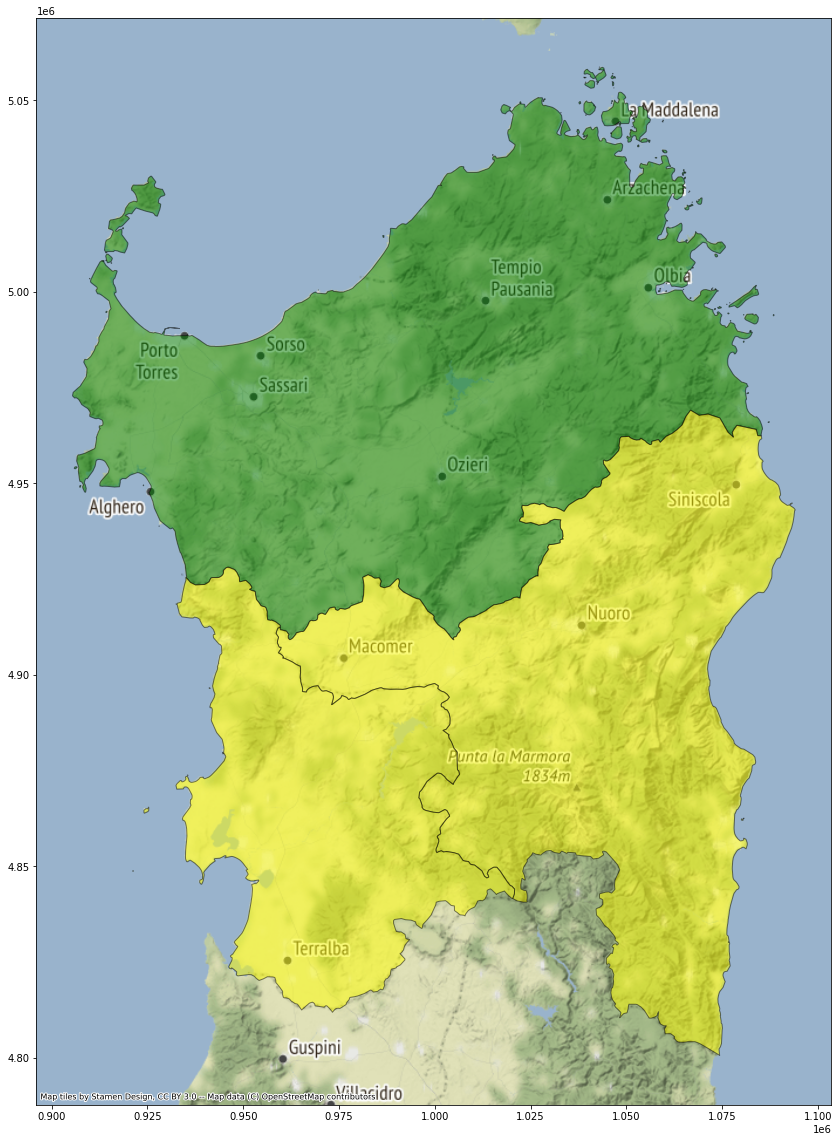

In [ ]:
max = province[province.Shape_Area == province.Shape_Area.max()]
tocca = province[province.touches(max.geometry.squeeze())]

ax = max.to_crs(epsg=3857).plot(figsize =(20,20), facecolor = "green", edgecolor = "k", alpha = 0.5)
tocca.to_crs(epsg=3857).plot(ax=ax, facecolor = "yellow", edgecolor = "k", alpha = 0.5)
contextily.add_basemap(ax, crs=3857)

Estrarre dalle province le province lombarde. Utilizzare poi il dataset così ottenuto per visualizzare le
province attraversate da un corso d’acqua inserito dall’utente. Visualizzare infine le province e il corso
d’acqua su una mappa. Controllare che il nome del corso d’acqua sia presente nel dataset: in caso negativo
dare un messaggio di errore.

In [ ]:
Corsi_acqua = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Geopandas Esercizi/File.ZIP/Corsi_acqua_Piano_di_Gestione.zip")
Corsi_acqua.head(5)

OBJECTID  ...                                           geometry
0       188  ...  LINESTRING (480362.262 5040575.220, 480364.627...
1       191  ...  MULTILINESTRING ((494060.091 5029696.046, 4940...
2       215  ...  MULTILINESTRING ((536963.747 5005395.412, 5369...
3       252  ...  LINESTRING (509280.513 5047845.024, 509281.795...
4       255  ...  LINESTRING (528977.056 5024109.798, 528981.181...

[5 rows x 31 columns]

In [ ]:
# Cerchiamo la Lombardia e le sue Province
Lombardia = regioni.loc[regioni.DEN_REG == "Lombardia"]

province_Lombardia = province[province.within(Lombardia.geometry.squeeze())]
province_Lombardia

COD_RIP  ...                                           geometry
11         1  ...  POLYGON ((483071.566 5104606.092, 483258.471 5...
12         1  ...  MULTIPOLYGON (((498077.207 5089780.202, 497614...
13         1  ...  POLYGON ((595652.358 5163515.659, 596042.420 5...
14         1  ...  MULTIPOLYGON (((538136.289 5004372.814, 539162...
15         1  ...  POLYGON ((585288.233 5104483.085, 585414.669 5...
16         1  ...  POLYGON ((615296.024 5132340.876, 615374.024 5...
17         1  ...  MULTIPOLYGON (((485536.366 4985444.605, 485366...
18         1  ...  POLYGON ((542189.537 5037362.585, 542408.347 5...
19         1  ...  POLYGON ((630538.958 5031669.589, 632819.864 5...
96         1  ...  POLYGON ((532079.618 5104664.092, 533286.608 5...
97         1  ...  POLYGON ((534551.968 5035118.603, 534818.280 5...
103        1  ...  POLYGON ((519754.706 5065242.380, 520199.702 5...

[12 rows x 13 columns]

In [ ]:
input_corsi = input("inserisci corso: ")

corso = Corsi_acqua.loc[Corsi_acqua.NOME == input_corsi]

province_corso = province_Lombardia[province_Lombardia.intersects(corso.unary_union)]
province_corso

inserisci corso: Ticino (Fiume)


COD_RIP  ...                                           geometry
14        1  ...  MULTIPOLYGON (((538136.289 5004372.814, 539162...
17        1  ...  MULTIPOLYGON (((485536.366 4985444.605, 485366...

[2 rows x 13 columns]

inserisci Corsi_acqua: Ticino (Fiume)


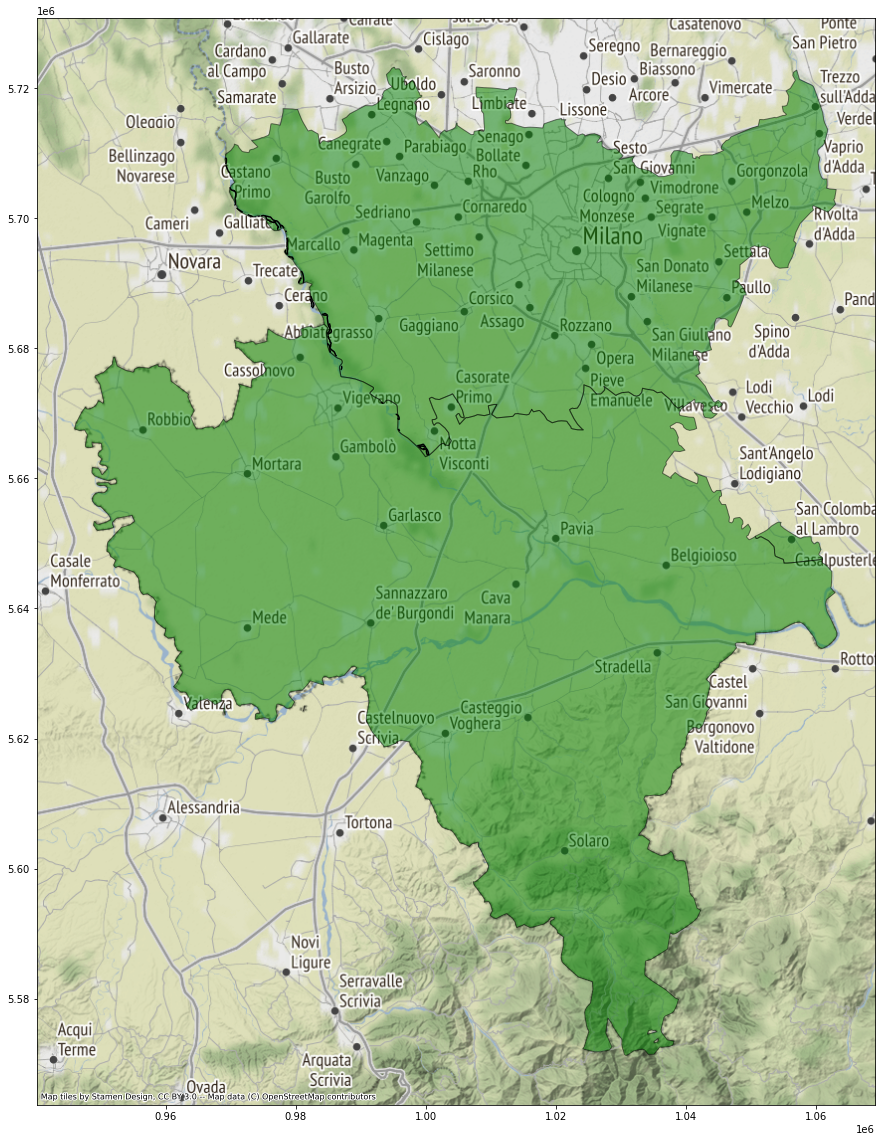

In [ ]:
lombardia = regioni.loc[regioni.DEN_REG == "Lombardia"]
provLom = province[province.within(lombardia.geometry.squeeze())]

input_corsi = input("inserisci Corsi_acqua: ")
if input_corsi in list(Corsi_acqua.NOME):
  corso = Corsi_acqua.loc[Corsi_acqua.NOME == input_corsi]
  prov_corso = province_Lombardia[province_Lombardia.intersects(corso.unary_union)]

  ax = prov_corso.to_crs(epsg=3857).plot(figsize =(20,20), facecolor = "green", edgecolor = "k", alpha = 0.5)
  corso.to_crs(epsg=3857).plot(ax=ax, color = "k")
  contextily.add_basemap(ax)

else:
  print("non esiste")
